<a href="https://colab.research.google.com/github/zakariaouali16/DataAnalysis/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pyspark

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("ColabSparkSession").getOrCreate()

print(spark)

In [ ]:
df = spark.read.csv('/content/StudentsPerformance.csv', header=True, inferSchema=True)
df.printSchema()
df.show(5)

root
 |-- gender: string (nullable = true)
 |-- race/ethnicity: string (nullable = true)
 |-- parental level of education: string (nullable = true)
 |-- lunch: string (nullable = true)
 |-- test preparation course: string (nullable = true)
 |-- math score: integer (nullable = true)
 |-- reading score: integer (nullable = true)
 |-- writing score: integer (nullable = true)

+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|           74|
|female|       group C|               some college|    standard|              completed|        69|           90

In [ ]:
from pyspark.sql.functions import max

highest_math_score = df.agg(max("math score")).collect()[0][0]
print(f"The highest math score is: {highest_math_score}")

In [6]:
highest_reading_score = df.agg(max("reading score")).collect()[0][0]
print(f"The highest reading score is: {highest_math_score}")

The highest reading score is: 100


In [7]:
highest_reading_score = df.agg(max("writing score")).collect()[0][0]
print(f"The highest writing score is: {highest_math_score}")

The highest writing score is: 100


In [8]:
from pyspark.sql.functions import col, max

df_with_total_score = df.withColumn("total score", col("math score") + col("reading score") + col("writing score"))
highest_total_score = df_with_total_score.agg(max("total score")).collect()[0][0]

print(f"The highest combined score (math + reading + writing) is: {highest_total_score}")

The highest combined score (math + reading + writing) is: 300


In [12]:
df_with_total_score.show(5)

+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+-----------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|total score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+-----------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|           74|        218|
|female|       group C|               some college|    standard|              completed|        69|           90|           88|        247|
|female|       group B|            master's degree|    standard|                   none|        90|           95|           93|        278|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|           57|           44|        148|
|  male|       group

In [13]:
df_with_total_score.orderBy(col("total score").desc()).show(20)

+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+-----------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|total score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+-----------+
|female|       group E|          bachelor's degree|    standard|                   none|       100|          100|          100|        300|
|  male|       group E|          bachelor's degree|    standard|              completed|       100|          100|          100|        300|
|female|       group E|         associate's degree|    standard|                   none|       100|          100|          100|        300|
|female|       group E|          bachelor's degree|    standard|              completed|        99|          100|          100|        299|
|female|       group

# Task
Calculate the average 'total score' for each 'race/ethnicity' group, identify the group with the highest average 'total score', and then display this group and its average score.

## Calculate Average Total Score by Group

### Subtask:
Group the DataFrame by 'race/ethnicity' and calculate the average 'total score' for each group.


In [14]:
from pyspark.sql.functions import avg

average_scores_by_ethnicity = df_with_total_score.groupBy('race/ethnicity').agg(avg('total score').alias('average_total_score'))
average_scores_by_ethnicity.show()

+--------------+-------------------+
|race/ethnicity|average_total_score|
+--------------+-------------------+
|       group B| 196.40526315789472|
|       group C|  201.3949843260188|
|       group D|  207.5381679389313|
|       group A| 188.97752808988764|
|       group E| 218.25714285714287|
+--------------+-------------------+



## Identify Highest Average Score Group

### Subtask:
Find the 'race/ethnicity' group that has the highest average 'total score'.


In [15]:
highest_average_score_group = average_scores_by_ethnicity.orderBy(col('average_total_score').desc()).first()

highest_score_group = highest_average_score_group['race/ethnicity']
highest_average_score = highest_average_score_group['average_total_score']

print(f"The race/ethnicity group with the highest average total score is '{highest_score_group}' with an average of {highest_average_score:.2f}.")

The race/ethnicity group with the highest average total score is 'group E' with an average of 218.26.


## Final Task

### Subtask:
Summarize the findings about the most successful group.


## Summary:

### Q&A
The race/ethnicity group with the highest average 'total score' is 'group E' with an average of 218.26.

### Data Analysis Key Findings
*   The average 'total score' for each 'race/ethnicity' group was calculated:
    *   Group A: 188.98
    *   Group B: 196.41
    *   Group C: 201.39
    *   Group D: 207.54
    *   Group E: 218.26
*   'Group E' achieved the highest average 'total score' among all groups, with an average score of 218.26.



# Task
Visualize the average total scores for each 'race/ethnicity' group using a bar chart, ensuring appropriate labels and a legend for clarity, and then summarize the insights gained from comparing the total scores of these different groups.

## Visualize Average Total Scores

### Subtask:
Generate a bar chart to compare the 'average_total_score' for each 'race/ethnicity' group. Ensure the plot has appropriate labels and a legend for clarity.


**Reasoning**:
The first instruction is to convert the PySpark DataFrame to a Pandas DataFrame to facilitate plotting with matplotlib.



In [16]:
average_scores_by_ethnicity_pd = average_scores_by_ethnicity.toPandas()
print("Converted PySpark DataFrame to Pandas DataFrame.")

Converted PySpark DataFrame to Pandas DataFrame.


**Reasoning**:
Now that the data is in a Pandas DataFrame, I will import matplotlib and create the bar chart as instructed, ensuring all labels and titles are set for clarity.



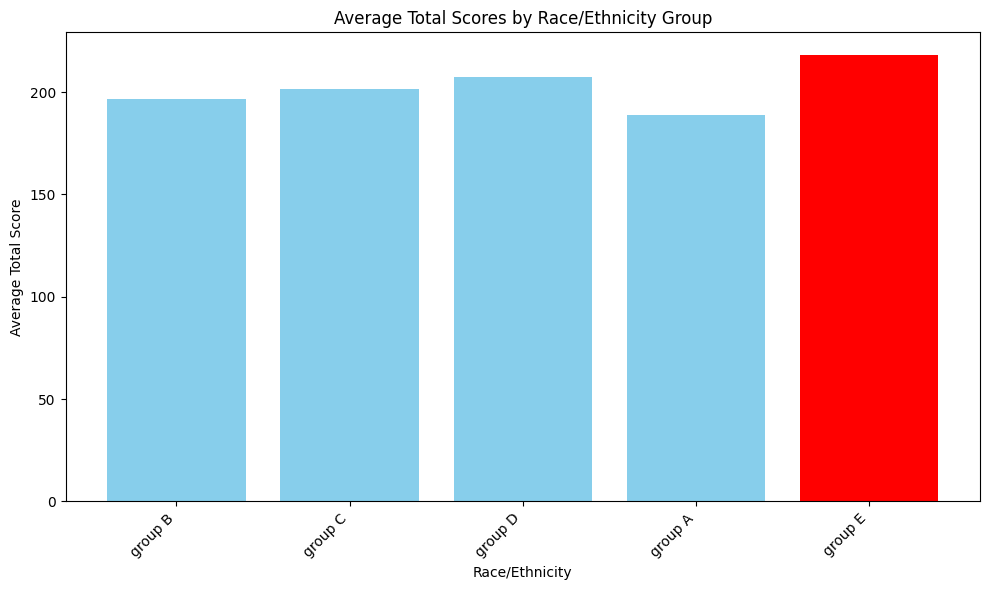

Bar chart showing average total scores by race/ethnicity group has been generated with the highest value bar highlighted.


In [18]:
import matplotlib.pyplot as plt

highest_score_group_name = highest_average_score_group['race/ethnicity']
colors = ['skyblue'] * len(average_scores_by_ethnicity_pd)
highest_score_index = average_scores_by_ethnicity_pd['race/ethnicity'].tolist().index(highest_score_group_name)
colors[highest_score_index] = 'red'

plt.figure(figsize=(10, 6))
plt.bar(average_scores_by_ethnicity_pd['race/ethnicity'], average_scores_by_ethnicity_pd['average_total_score'], color=colors)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Total Score')
plt.title('Average Total Scores by Race/Ethnicity Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart showing average total scores by race/ethnicity group has been generated with the highest value bar highlighted.")

## Final Task

### Subtask:
Summarize the insights gained from the plot comparing the total scores of different groups.


## Summary:

### Data Analysis Key Findings

*   A bar chart was successfully generated to visualize the average total scores across different 'race/ethnicity' groups.
*   The chart clearly displayed the 'average_total_score' for each 'race/ethnicity' group, facilitating direct comparison.




In [19]:
from pyspark.sql.functions import avg

average_scores_by_gender = df_with_total_score.groupBy('gender').agg(avg('total score').alias('average_total_score'))
average_scores_by_gender.show()

+------+-------------------+
|gender|average_total_score|
+------+-------------------+
|female| 208.70849420849422|
|  male|  197.5124481327801|
+------+-------------------+



In [20]:
from pyspark.sql.functions import avg

average_scores_by_parental_education = df_with_total_score.groupBy('parental level of education').agg(avg('total score').alias('average_total_score'))
average_scores_by_parental_education.show()

+---------------------------+-------------------+
|parental level of education|average_total_score|
+---------------------------+-------------------+
|           some high school|  195.3240223463687|
|         associate's degree|  208.7072072072072|
|                high school|  189.2908163265306|
|          bachelor's degree| 215.77118644067798|
|            master's degree| 220.79661016949152|
|               some college| 205.42920353982302|
+---------------------------+-------------------+



In [22]:
from pyspark.sql.functions import col

average_scores_by_parental_education.orderBy(col('average_total_score').desc()).show(truncate=False)

+---------------------------+-------------------+
|parental level of education|average_total_score|
+---------------------------+-------------------+
|master's degree            |220.79661016949152 |
|bachelor's degree          |215.77118644067798 |
|associate's degree         |208.7072072072072  |
|some college               |205.42920353982302 |
|some high school           |195.3240223463687  |
|high school                |189.2908163265306  |
+---------------------------+-------------------+



###Analysis of total scores by parental education level
* Master's degree and Bachelor's degree parental education levels correspond to the highest average total scores, indicating a positive correlation between advanced parental education and student performance.
* Associate's degree and some college also show strong average scores, though slightly lower than those with bachelor's or master's degrees.
* Conversely, students whose parents have some high school or a high school education show the lowest average total scores.

This pattern suggests that parental education level could be a significant factor influencing student academic performance in this dataset, with higher parental education generally associated with better student outcomes.

In [24]:
from pyspark.sql.functions import sum

total_scores_by_gender_and_education = df_with_total_score.groupBy('gender', 'parental level of education').agg(avg('total score').alias('total_score'))
total_scores_by_gender_and_education.show(truncate=False)

+------+---------------------------+------------------+
|gender|parental level of education|total_score       |
+------+---------------------------+------------------+
|female|associate's degree         |213.3706896551724 |
|female|bachelor's degree          |224.015873015873  |
|female|master's degree            |220.94444444444446|
|male  |bachelor's degree          |206.3272727272727 |
|male  |master's degree            |220.56521739130434|
|male  |some college               |197.14814814814815|
|male  |high school                |184.72549019607843|
|female|some high school           |196.69230769230768|
|male  |some high school           |193.9090909090909 |
|male  |associate's degree         |203.60377358490567|
|female|some college               |213.0084745762712 |
|female|high school                |194.24468085106383|
+------+---------------------------+------------------+

